# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

In [35]:
dataset = pd.read_csv('D:/data/HDI.csv')

In [36]:
dataset.head()

,HDI Rank,Country,1990,1991,1992,1993,1994,1995,1996,1997,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,169,Afghanistan,0.302,0.307,0.316,0.312,0.307,0.331,0.335,0.339,...,0.472,0.477,0.489,0.496,0.5,0.5,0.502,0.506,0.509,0.511
1,69,Albania,0.65,0.631,0.615,0.618,0.624,0.637,0.646,0.645,...,0.745,0.764,0.775,0.782,0.787,0.788,0.788,0.790,0.792,0.795
2,91,Algeria,0.572,0.576,0.582,0.586,0.59,0.595,0.602,0.611,...,0.721,0.728,0.728,0.729,0.736,0.74,0.743,0.745,0.746,0.748
3,36,Andorra,..,..,..,..,..,..,..,..,...,0.837,0.836,0.858,0.856,0.863,0.862,0.866,0.863,0.867,0.868
4,148,Angola,..,..,..,..,..,..,..,..,...,0.517,0.533,0.544,0.555,0.565,0.572,0.578,0.582,0.582,0.581


# Selecting Features

In [37]:
 x = dataset.iloc[:,1:3]

In [38]:
x

,Country,1990
0,Afghanistan,0.302
1,Albania,0.65
2,Algeria,0.572
3,Andorra,..
4,Angola,..
...,...,...
184,Venezuela (Bolivarian Republic of),0.644
185,Viet Nam,0.483
186,Yemen,0.401
187,Zambia,0.421


# Clustering

In [39]:
dataset.shape

(189, 32)

In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HDI Rank  189 non-null    int64  
 1   Country   189 non-null    object 
 2   1990      189 non-null    object 
 3   1991      189 non-null    object 
 4   1992      189 non-null    object 
 5   1993      189 non-null    object 
 6   1994      189 non-null    object 
 7   1995      189 non-null    object 
 8   1996      189 non-null    object 
 9   1997      189 non-null    object 
 10  1998      189 non-null    object 
 11  1999      189 non-null    object 
 12  2000      189 non-null    object 
 13  2001      189 non-null    object 
 14  2002      189 non-null    object 
 15  2003      189 non-null    object 
 16  2004      189 non-null    object 
 17  2005      189 non-null    object 
 18  2006      189 non-null    object 
 19  2007      189 non-null    object 
 20  2008      189 non-null    object

In [41]:
dataset.isnull().sum()

HDI Rank    0
Country     0
1990        0
1991        0
1992        0
1993        0
1994        0
1995        0
1996        0
1997        0
1998        0
1999        0
2000        0
2001        0
2002        0
2003        0
2004        0
2005        0
2006        0
2007        0
2008        0
2009        0
2010        0
2011        0
2012        0
2013        0
2014        0
2015        0
2016        0
2017        0
2018        0
2019        0
dtype: int64

In [44]:
dataset.describe()

,HDI Rank,2017,2018,2019
count,189.000000,189.000000,189.000000,189.000000
mean,94.783069,0.716783,0.719423,0.722423
std,54.754486,0.150598,0.150379,0.149791
min,1.000000,0.386000,0.391000,0.394000
25%,48.000000,0.595000,0.599000,0.602000
50%,95.000000,0.736000,0.738000,0.740000
75%,142.000000,0.822000,0.826000,0.829000
max,189.000000,0.954000,0.956000,0.957000


In [46]:
dataset['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Congo',
       'Congo (Democratic Republic of the)', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', "Côte d'Ivoire", 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini (Kingdom of)', 'Ethiopia', 'Fiji', 'Finland', 'France',
       'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece',
     

In [47]:
len(dataset['Country'].unique())

189

In [48]:
dataset['1990'].unique()

array(['0.302', '0.65', '0.572', '..', '0.718', '0.654', '0.871', '0.803',
       '0.749', '0.394', '0.732', '0.813', '0.61', '0.364', '0.551',
       '0.573', '0.613', '0.767', '0.708', '0.299', '0.368', '0.448',
       '0.85', '0.334', '0.706', '0.499', '0.603', '0.5', '0.369',
       '0.665', '0.677', '0.68', '0.735', '0.738', '0.404', '0.806',
       '0.599', '0.648', '0.548', '0.536', '0.541', '0.662', '0.79',
       '0.786', '0.349', '0.808', '0.465', '0.761', '0.481', '0.282',
       '0.414', '0.519', '0.784', '0.807', '0.429', '0.523', '0.565',
       '0.56', '0.773', '0.801', '0.776', '0.645', '0.818', '0.625',
       '0.69', '0.482', '0.705', '0.64', '0.405', '0.711', '0.498',
       '0.724', '0.797', '0.333', '0.643', '0.234', '0.752', '0.397',
       '0.624', '0.656', '0.578', '0.457', '0.227', '0.342', '0.581',
       '0.387', '0.836', '0.826', '0.497', '0.22', '0.849', '0.402',
       '0.675', '0.38', '0.598', '0.593', '0.75', '0.248', '0.633',
       '0.452', '0.697', '0

In [49]:
len(dataset['1990'].unique())

130

In [50]:
dataset['1995'].unique()

array(['0.331', '0.637', '0.595', '..', '0.741', '0.627', '0.888',
       '0.825', '0.604', '0.778', '0.434', '0.747', '0.66', '0.859',
       '0.624', '0.391', '0.589', '0.576', '0.651', '0.79', '0.71',
       '0.292', '0.432', '0.862', '0.319', '0.728', '0.545', '0.471',
       '0.347', '0.697', '0.703', '0.659', '0.788', '0.761', '0.409',
       '0.837', '0.351', '0.63', '0.666', '0.578', '0.58', '0.729',
       '0.523', '0.686', '0.823', '0.832', '0.37', '0.842', '0.483',
       '0.776', '0.511', '0.306', '0.588', '0.423', '0.54', '0.811',
       '0.746', '0.831', '0.461', '0.56', '0.539', '0.805', '0.808',
       '0.674', '0.693', '0.664', '0.468', '0.783', '0.748', '0.68',
       '0.754', '0.821', '0.389', '0.682', '0.555', '0.265', '0.772',
       '0.442', '0.653', '0.677', '0.638', '0.554', '0.487', '0.248',
       '0.38', '0.582', '0.419', '0.868', '0.531', '0.24', '0.881',
       '0.426', '0.704', '0.425', '0.625', '0.646', '0.609', '0.745',
       '0.767', '0.782', '0.694', 

In [51]:
len(dataset['1995'].unique())

132

In [52]:
dataset.drop(['1990', '1995'], axis=1, inplace=True)

In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HDI Rank  189 non-null    int64  
 1   Country   189 non-null    object 
 2   1991      189 non-null    object 
 3   1992      189 non-null    object 
 4   1993      189 non-null    object 
 5   1994      189 non-null    object 
 6   1996      189 non-null    object 
 7   1997      189 non-null    object 
 8   1998      189 non-null    object 
 9   1999      189 non-null    object 
 10  2000      189 non-null    object 
 11  2001      189 non-null    object 
 12  2002      189 non-null    object 
 13  2003      189 non-null    object 
 14  2004      189 non-null    object 
 15  2005      189 non-null    object 
 16  2006      189 non-null    object 
 17  2007      189 non-null    object 
 18  2008      189 non-null    object 
 19  2009      189 non-null    object 
 20  2010      189 non-null    object

In [54]:
dataset.head()

,HDI Rank,Country,1991,1992,1993,1994,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,169,Afghanistan,0.307,0.316,0.312,0.307,0.335,0.339,0.344,0.348,...,0.472,0.477,0.489,0.496,0.5,0.5,0.502,0.506,0.509,0.511
1,69,Albania,0.631,0.615,0.618,0.624,0.646,0.645,0.655,0.665,...,0.745,0.764,0.775,0.782,0.787,0.788,0.788,0.790,0.792,0.795
2,91,Algeria,0.576,0.582,0.586,0.59,0.602,0.611,0.621,0.629,...,0.721,0.728,0.728,0.729,0.736,0.74,0.743,0.745,0.746,0.748
3,36,Andorra,..,..,..,..,..,..,..,..,...,0.837,0.836,0.858,0.856,0.863,0.862,0.866,0.863,0.867,0.868
4,148,Angola,..,..,..,..,..,..,..,0.391,...,0.517,0.533,0.544,0.555,0.565,0.572,0.578,0.582,0.582,0.581


In [55]:
X = dataset

y = dataset['Country']

In [56]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

X['Country'] = le.fit_transform(X['Country'])

y = le.transform(y)

In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 30 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HDI Rank  189 non-null    int64  
 1   Country   189 non-null    int32  
 2   1991      189 non-null    object 
 3   1992      189 non-null    object 
 4   1993      189 non-null    object 
 5   1994      189 non-null    object 
 6   1996      189 non-null    object 
 7   1997      189 non-null    object 
 8   1998      189 non-null    object 
 9   1999      189 non-null    object 
 10  2000      189 non-null    object 
 11  2001      189 non-null    object 
 12  2002      189 non-null    object 
 13  2003      189 non-null    object 
 14  2004      189 non-null    object 
 15  2005      189 non-null    object 
 16  2006      189 non-null    object 
 17  2007      189 non-null    object 
 18  2008      189 non-null    object 
 19  2009      189 non-null    object 
 20  2010      189 non-null    object

In [58]:
X.head()

,HDI Rank,Country,1991,1992,1993,1994,1996,1997,1998,1999,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,169,0,0.307,0.316,0.312,0.307,0.335,0.339,0.344,0.348,...,0.472,0.477,0.489,0.496,0.5,0.5,0.502,0.506,0.509,0.511
1,69,1,0.631,0.615,0.618,0.624,0.646,0.645,0.655,0.665,...,0.745,0.764,0.775,0.782,0.787,0.788,0.788,0.790,0.792,0.795
2,91,2,0.576,0.582,0.586,0.59,0.602,0.611,0.621,0.629,...,0.721,0.728,0.728,0.729,0.736,0.74,0.743,0.745,0.746,0.748
3,36,3,..,..,..,..,..,..,..,..,...,0.837,0.836,0.858,0.856,0.863,0.862,0.866,0.863,0.867,0.868
4,148,4,..,..,..,..,..,..,..,0.391,...,0.517,0.533,0.544,0.555,0.565,0.572,0.578,0.582,0.582,0.581


In [59]:
cols = X.columns

In [61]:
X = pd.DataFrame(X, columns=[cols])

In [66]:
dataset.isna().sum().sum()

0

In [67]:
dataset.describe()

,HDI Rank,Country,2017,2018,2019
count,189.000000,189.000000,189.000000,189.000000,189.000000
mean,94.783069,94.000000,0.716783,0.719423,0.722423
std,54.754486,54.703748,0.150598,0.150379,0.149791
min,1.000000,0.000000,0.386000,0.391000,0.394000
25%,48.000000,47.000000,0.595000,0.599000,0.602000
50%,95.000000,94.000000,0.736000,0.738000,0.740000
75%,142.000000,141.000000,0.822000,0.826000,0.829000
max,189.000000,188.000000,0.954000,0.956000,0.957000


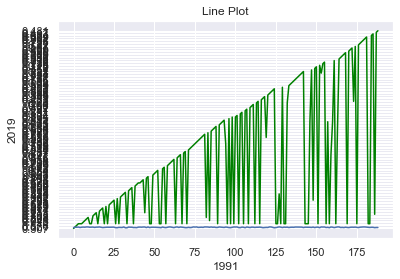

In [68]:
plt.plot(dataset['1991'], color='green')
plt.plot(dataset['2019'])
plt.title("Line Plot")
plt.xlabel('1991')
plt.ylabel('2019')
plt.show()

In [69]:
def matrix(filename):
    data = pd.read_csv(filename)
    data = data.apply(lambda col:pd.Categorical(col).codes)
    array=data.to_numpy()
    return array

In [72]:
dataset = dataset.drop('HDI Rank', axis=1)

In [73]:
y = dataset['1991']
X = dataset.drop('2019', axis=1)

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.neural_network import MLPClassifier

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [82]:
X_train

,Country,1991,1992,1993,1994,1996,1997,1998,1999,2000,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
137,137,0.716,0.719,0.73,0.739,0.753,0.764,0.774,0.783,0.79,...,0.834,0.84,0.845,0.842,0.856,0.858,0.863,0.869,0.873,0.877
25,25,0.705,0.705,0.704,0.705,0.718,0.713,0.718,0.716,0.72,...,0.782,0.788,0.791,0.795,0.801,0.806,0.809,0.811,0.811,0.813
90,90,0.743,0.75,0.76,0.772,0.793,0.805,0.802,0.813,0.823,...,0.877,0.889,0.895,0.898,0.901,0.904,0.907,0.91,0.912,0.914
17,17,0.614,0.621,0.624,0.623,0.624,0.626,0.628,0.633,0.64,...,0.684,0.695,0.694,0.701,0.702,0.705,0.71,0.717,0.714,0.714
97,97,..,..,..,..,..,..,..,0.399,0.435,...,0.452,0.455,0.472,0.469,0.477,0.478,0.477,0.478,0.481,0.480
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,110,0.63,0.637,0.643,0.647,0.656,0.661,0.667,0.672,0.678,...,0.745,0.751,0.76,0.771,0.779,0.789,0.789,0.794,0.797,0.801
119,119,0.583,0.587,0.587,0.587,0.573,0.564,0.557,0.547,0.544,...,0.576,0.589,0.602,0.613,0.624,0.631,0.638,0.639,0.644,0.645
3,3,..,..,..,..,..,..,..,..,0.813,...,0.839,0.837,0.836,0.858,0.856,0.863,0.862,0.866,0.863,0.867
106,106,0.241,0.246,0.253,0.26,0.274,0.285,0.294,0.306,0.312,...,0.401,0.408,0.413,0.413,0.413,0.419,0.417,0.422,0.427,0.431
